# Bounded Optimization Operands

In [1]:
import numpy as np

from optiland import optic, optimization

Define a starting lens:

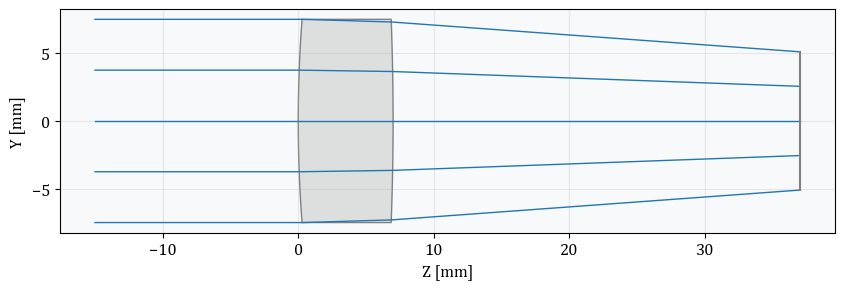

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(index=1, thickness=7, radius=100, material="N-SF2", is_stop=True)
lens.add_surface(index=2, thickness=30, radius=-200)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization). There are two options:

1. Provide an exact `target` for the value.
2. Provide a `min_val` and/or `max_val` to require only that the operand falls within bounds.

In [ ]:
input_data = {"optic": lens}

# add focal length operand with minimum and maximum values
problem.add_operand(
    operand_type="f2",
    min_val=15,
    max_val=18,
    weight=1,
    input_data=input_data,
)

# only minimum value or only maximum value can be set. By default, both are None.
# problem.add_operand(operand_type='f2', min_val=15, max_val=None, weight=1,
#                     input_data=input_data)
# problem.add_operand(operand_type='f2', min_val=None, max_val=18, weight=1,
#                     input_data=input_data)

Define variables - let radius of curvature vary for both surfaces, at surface index 1 and 2:

In [5]:
problem.add_variable(lens, "radius", surface_number=1)
problem.add_variable(lens, "radius", surface_number=2)

Check initial merit function value and system properties:

In [6]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                7266.02 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │ Target   │   Min. Bound │   Max. Bound │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ f2             │          │           15 │           18 │        1 │ 103.241 │  85.241 │            100 │
╘════╧════════════════╧══════════╧══════════════╧══════════════╧══════════╧═════════╧═════════╧════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   Value │ Min. Bound   │ Max. Bound   │
╞════╪═══════════════

Define optimizer:

In [7]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [8]:
optimizer.optimize()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0
        x: [-8.863e-01 -2.765e+00]
      nit: 2
      jac: [ 0.000e+00  0.000e+00]
     nfev: 12
     njev: 4
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization.

Here we see that the focal length falls within our minimum and maximum bounds.

In [9]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                      0 │               100 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │ Target   │   Min. Bound │   Max. Bound │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ f2             │          │           15 │           18 │        1 │  16.636 │       0 │              0 │
╘════╧════════════════╧══════════╧══════════════╧══════════════╧══════════╧═════════╧═════════╧════════════════╛
╒════╤═════════════════╤═══════════╤═══════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │     Value │ Min. Bound   │ Max. Bound   │
╞════╪═══════════

Draw final lens:

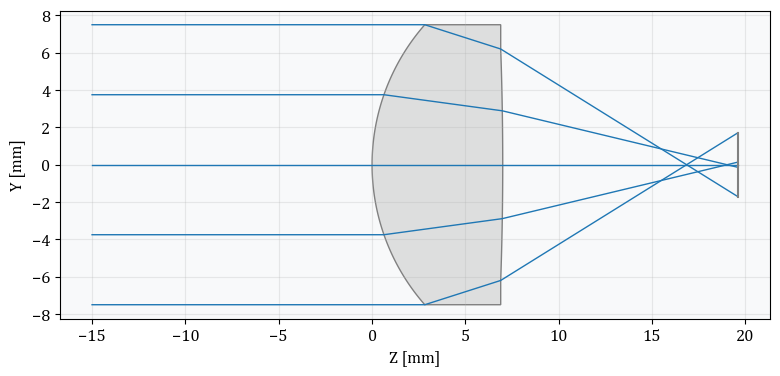

In [10]:
lens.image_solve()  # move image plane to the paraxial focus
lens.draw(num_rays=5)